# Image Filtering

Image filtering is a fundamental concept in computer vision and image processing. It involves applying a filter (also known as a kernel) to an image in order to perform operations such as blurring, sharpening, edge detection, and more. The OpenCV library (cv2) in Python is a powerful tool for image processing, including image filtering.

## Smoothing Images

Image smoothing, also known as blurring, is a widely used image processing technique. It's employed to decrease noise, suppress fine details, or ready an image for subsequent analysis. To continue with the following steps, we'll use the following reference image and its noisy variant.

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Import the plotting library

# Define color codes for convenience
Colors = {'White': (255, 255, 255),
            'Black': (0, 0, 0),
            'Red': (255, 0, 0),
            'Green': (0, 255, 0),
            'Blue': (0, 0, 255),
            'Yellow': (255, 255, 0),
            'Purple': (128, 0, 128),
            'Indigo': (75, 0, 130),
            'OrangeRed': (255, 69, 0)}

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(9.5, 4))  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        # Display the image in grayscale if grayscale is True, otherwise in color
        ax[i].imshow(Images[i], cmap='gray' if grayscale else None)
        ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        ax[i].axis('off')  # Turn off axis
        ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        # Set main title if provided
        fig.suptitle(title, weight='bold', fontsize=18)

    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

<font color='Blue'><b>Example - Noisy Image:</b></font> For the following example, we employ an image depicting the main campus of the University of Calgary, accessible at https://conted.ucalgary.ca/maincampus/maincampus.jpg.

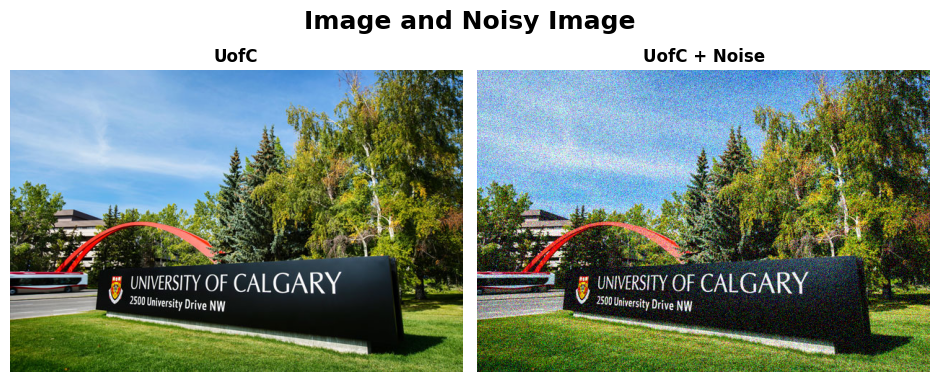

In [ ]:
# Import necessary libraries
import numpy as np
import cv2
from skimage import io

# Load an image from a URL
Img = io.imread(r'https://conted.ucalgary.ca/maincampus/maincampus.jpg')

# Define a function that standardizes image values
def ImgStd(Inp):
    '''
    Standardizes image values.

    Parameters:
        Inp (numpy.ndarray): Input image.

    Returns:
        numpy.ndarray: Standardized image.
    '''
    Out = np.round(Inp).astype(int)  # Round the input values and convert to integers
    Out[Out < 0] = 0  # Set any negative values to 0
    Out[Out > 255] = 255  # Set any values above 255 to 255 (maximum pixel value)
    return Out  # Return the standardized image

# Define the parameters for generating a noisy image
mu = 0  # Mean of the noise
sigma = 30  # Standard deviation of the noise

# Create a noisy image by adding Gaussian noise to a copy of the original image
Img_noise = Img.copy() - np.random.normal(mu, sigma, size=Img.shape)

# Standardize the noisy image using the defined ImgStd function
Img_noise = ImgStd(Img_noise).astype('uint8')

# Display the original image and the noisy image side by side
_ = ImShow(Images=[Img, Img_noise],
           Names=['UofC', 'UofC + Noise'],
           title= 'Image and Noisy Image')

### 2D Convolution (Image Filtering)


1. **Padding**:
   Padding is a technique used in convolutional operations to control the spatial dimensions of the output feature map. It involves adding extra rows and columns of zeros around the input image before applying the convolution operation. Padding is typically used to:

   - **Preserve Spatial Dimensions**: Padding helps maintain the spatial dimensions of the output feature map, ensuring that it has the same size as the input. This can be important when you want to preserve spatial information.

   - **Mitigate Boundary Effects**: Without padding, the convolution operation tends to lose information near the image borders. Padding helps mitigate this issue by allowing the kernel to process pixels at the image boundaries more effectively.

   In OpenCV (cv2), you can specify the type of padding you want when using the `cv2.filter2D()` function. Common padding modes include 'valid' (no padding), 'same' (padding to match the output size with the input size), and 'full' (maximum padding to ensure the kernel covers the entire input).

2. **Strides**:
   Strides determine how the convolutional kernel moves or steps across the input image during the convolution operation. A stride value of 1 means the kernel moves one pixel at a time, while a stride value greater than 1 means it skips some pixels.

   - **Stride of 1**: A stride of 1 processes each pixel in the input image, resulting in output feature maps with similar spatial dimensions as the input.

   - **Stride greater than 1**: A larger stride value skips pixels, resulting in output feature maps with reduced spatial dimensions. This can be useful for downsampling and reducing computational complexity.

In OpenCV (cv2), you can specify the stride when using the `cv2.filter2D()` function. By default, the stride is set to 1, but you can modify it to control the spatial downsampling or upsampling effect.

<center>
<img src="https://raw.githubusercontent.com/HatefDastour/hatefdastour.github.io/master/_notes/Introduction_to_Digital_Engineering/_images/Conv3by3.gif" alt="picture" width="450">

Illustration of the convolution process using a 3 by 3 kernel applied to a 5 by 5 matrix with a stride of 1 and padding of 1. Image courtesy of [Dumoulin and Visin, 2016, Shafkat, 2023].

</center>

***
<font color='Red'><b>Remark:</b></font>

To determine the size of padding required based on the size of the kernel and the desired stride, you can use the following formula:

\begin{equation} \text{Padding size} = \left\lfloor \frac{\text{Kernel size} - 1}{2} \right\rfloor \times \text{Stride} \end{equation}

Here's what each component means:

- **Padding size**: This is the size of the padding you need to add to the input image or matrix.
- **Kernel size**: This refers to the dimensions of your convolutional kernel. For example, a 3x3 kernel has a size of 3.
- **Stride**: The stride determines how much the kernel moves between each convolution operation. A stride of 1 means it moves one step at a time.

Let's consider an example:

Suppose you have a 3x3 kernel and you want to apply it with a stride of 2. Using the formula:

\begin{equation} \text{Padding size} = \left\lfloor \frac{3 - 1}{2} \right\rfloor \times 2 = \left\lfloor \frac{2}{2} \right\rfloor \times 2 = 1 \times 2 = 2 \end{equation}

Thus, in this case, you would need to add a padding of 2 units around your input image or matrix to achieve the desired stride of 2 while maintaining the dimensions.
***

The Python function `cv2.filter2D()` is a method from the OpenCV (Open Source Computer Vision Library) used for applying a custom convolutional filter to an input image (source) in order to perform image processing operations. Here's a refined explanation of its parameters and return value:

```
cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst
```

- **src**: This parameter represents the input image, often referred to as the "source" image, on which the filter operation is applied. It's a mandatory argument and should be a multi-channel image (e.g., RGB or grayscale).

- **ddepth**: This specifies the desired depth of the output image (destination). It determines the data type of the destination image, which can be different from the source image. Common data types include `cv2.CV_8U` for 8-bit unsigned integers, `cv2.CV_32F` for 32-bit floating-point numbers, etc.

- **kernel**: The kernel is a user-defined convolution matrix that defines the filter's behavior. This parameter is essential and should be a numerical matrix (numpy array) used for filtering the source image. The kernel defines the weights applied to the image pixels to compute the output.

- **dst** (optional): This is the destination image, which is where the filtered result is stored. If not provided, the function creates a new image to store the result. It should have the same size and type as the source image.

- **anchor** (optional): This parameter denotes the relative position within the kernel. It specifies the anchor point with respect to which the convolution operation is performed. The anchor point determines the alignment of the kernel over the source image.

- **delta** (optional): The value added to the filtered pixels, which can be used for contrast adjustment or to shift the intensity range of the output image.

- **borderType** (optional): This parameter determines the border mode applied when the kernel extends beyond the edges of the source image. Common border types include constant border, replicate border, reflect border, etc.

- **Returns**: The function returns the filtered image, which is the result of applying the specified kernel to the input image. The destination image (dst) contains the filtered output.

You can see the full description of the function [here](https://docs.opencv.org/2.4/modules/ocl/doc/image_filtering.html?highlight=filter2d#ocl-filter2d).

<font color='Blue'><b>Example</b></font>:

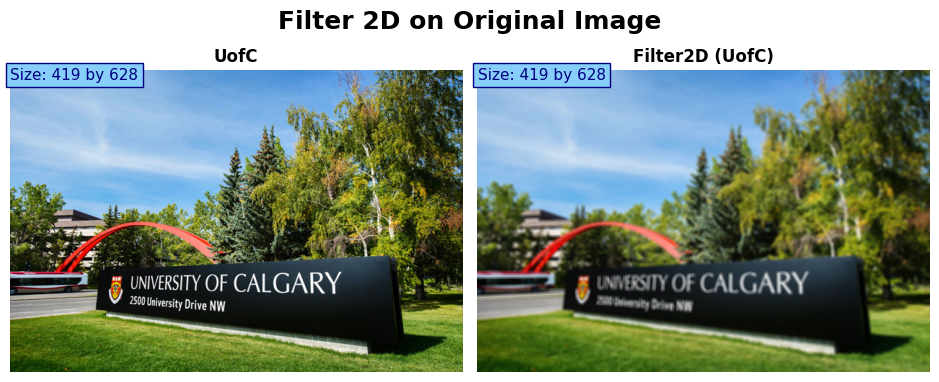

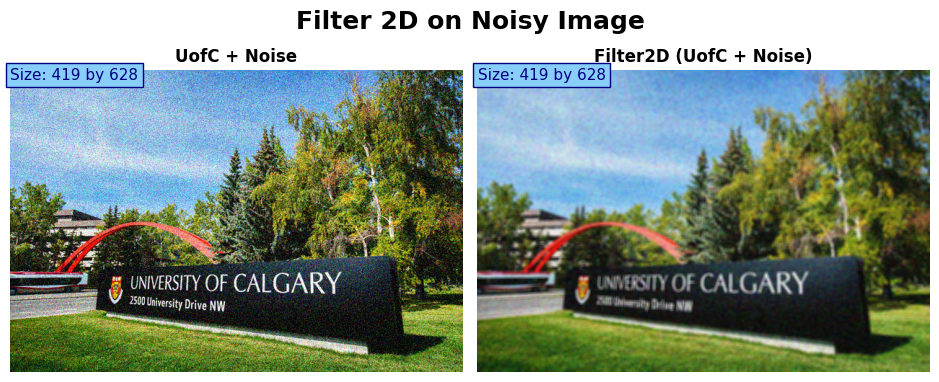

In [ ]:
# Import necessary libraries
import numpy as np  # Import NumPy for array operations
import cv2  # Import OpenCV for image processing

# Define a kernel for filtering (5x5 averaging kernel)
kernel = np.ones((5, 5), np.float32) / 25

# Apply the filter2D operation to the original image
Out = cv2.filter2D(src=Img,  # Source image
                   ddepth=-1,  # Use the same depth as the source image
                   kernel=kernel  # 2D array of filter coefficients
                   )

# Display the original noisy image and the filtered image side by side
fig, ax = ImShow(Images=[Img, Out], Names=['UofC', 'Filter2D (UofC)'], title='Filter 2D on Original Image')

# Add text indicating the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

# Apply the filter2D operation to the noisy image
Out = cv2.filter2D(src=Img_noise,  # Source image with noise
                   ddepth=-1,  # Use the same depth as the source image
                   kernel=kernel  # 2D array of filter coefficients
                   )

# Display the original noisy image and the filtered image side by side
fig, ax = ImShow(Images=[Img_noise, Out], Names=['UofC + Noise', 'Filter2D (UofC + Noise)'], title='Filter 2D on Noisy Image')

# Add text indicating the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

## Image Blurring (Image Smoothing)

Image blurring, also known as image smoothing or image filtering, is a fundamental image processing technique employed to mitigate high-frequency components within an image, such as noise and edges. Its primary purpose is to eliminate undesired details, resulting in a more visually cohesive and smoother appearance. Various blurring methods exist, each serving distinct purposes [Bradski, 2000, OpenCV Developers, 2023]:

1. **Gaussian Blur**: This technique employs a Gaussian kernel that convolves with the image pixels, producing a weighted average of neighboring pixels. These weights are determined by the Gaussian distribution, making it adept at reducing high-frequency noise while preserving image structure.

2. **Median Blur**: In this approach, every pixel in the image is replaced with the median value of its neighboring pixels. It is particularly effective in removing "salt-and-pepper" noise, where isolated pixels have extreme intensity values, leading to a cleaner image.

3. **Bilateral Filter**: A non-linear filter that considers both spatial and intensity differences during the blurring process. It excels at noise reduction while retaining the sharpness of significant image features and edges.

4. **Box Blur**: Also known as average blur, this method replaces each pixel with the average value of its neighboring pixels. While providing a simple and uniform blurring effect, it may not preserve intricate image details as effectively as other methods.

5. **Motion Blur**: Simulates the effect of camera or object motion, creating streak-like artifacts within the image. This blurring technique imparts a sense of movement and dynamics to the scene.

These diverse blurring methods can be implemented using a range of image processing libraries, such as OpenCV in the Python programming language. The choice of a specific blurring technique hinges on the unique requirements of the application and the intrinsic characteristics of the image content, allowing practitioners to tailor the approach to their specific needs.

This code creates a visual comparison of the original image and the image obtained by applying the `cv2.boxFilter` operation with different kernel sizes. The results are displayed in a 2x2 grid of subplots, each with appropriate titles and annotations indicating the kernel size used.

### Gaussian Blur

The `cv2.GaussianBlur()` function in Python is a part of the OpenCV library, widely used for image processing and computer vision tasks. This function applies Gaussian blurring to an input image (source image) and returns the result in the destination image (if provided) [Bradski, 2000, OpenCV Developers, 2023].

This function is used to generate a Gaussian kernel, often used in image processing for tasks like blurring and smoothing. Let's break down the documentation and its parameters academically:

- `ksize`: This parameter represents the aperture size of the Gaussian kernel. It should be an odd, positive integer. In mathematical terms, it must satisfy the condition `(ksize % 2) == 1`. The kernel size determines the size of the kernel matrix.

- `sigma`: The Gaussian standard deviation. This parameter controls the spread or "width" of the Gaussian distribution. If it is non-positive (e.g., zero or negative), the function computes `sigma` from `ksize` using the formula `sigma = 0.3 * ((ksize - 1) * 0.5 - 1) + 0.8`. This calculation ensures that a reasonable standard deviation is chosen based on the kernel size.

- `ktype`: This parameter specifies the type of filter coefficients. It can take one of two values: `cv2.CV_32F` for 32-bit floating-point coefficients or `cv2.CV_64F` for 64-bit floating-point coefficients. The choice of data type affects the precision of the filter coefficients.

The function `cv2.getGaussianKernel` calculates and returns a `ksize x 1` matrix (column vector) containing the Gaussian filter coefficients. The coefficients are computed using the Gaussian function formula:

\begin{equation}G_i = \alpha \cdot \exp\left({-\frac{(i - \frac{{\text{ksize}} - 1}{2})^2}{2 \cdot \text{sigma}^2}}\right)
\end{equation}

Where:
- $i$ ranges from 0 to `ksize - 1`.
- $\alpha$ is a scale factor chosen so that the sum of all Gaussian filter coefficients equals 1: $\sum_i G_i = 1$.

The generated Gaussian kernel is typically used in image filtering operations to apply Gaussian smoothing to an image. Gaussian smoothing helps reduce noise and blur the image in a controlled manner. The kernel can be passed to functions like `sepFilter2D` or `createSeparableLinearFilter`, which are designed to work with kernels efficiently. Alternatively, you can use the higher-level function `GaussianBlur` in OpenCV to apply Gaussian smoothing directly to an image.

For more details, please see [Gaussian Blur](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=cv2.blur#gaussianblur).

The formula used in `cv2.getGaussianKernel` for computing Gaussian filter coefficients is a discretized version of the continuous Gaussian function. Let's explore the relationship between the two:

1. **Continuous Gaussian Function**:
   - The continuous Gaussian function is a mathematical function used to describe the Gaussian probability distribution. It's defined as:
   
     \begin{equation}G(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}\end{equation}

     - $x$ is the continuous independent variable.
     - $\mu$ (mu) is the mean (average) value.
     - $\sigma$ (sigma) is the standard deviation, controlling the spread or width.
     - $e$ is the base of the natural logarithm (approximately 2.71828).
     - $\pi$ is the mathematical constant pi (approximately 3.14159).

2. **Discretized Gaussian Kernel** (from `cv2.getGaussianKernel`):
   - The formula for computing $G_i$ in the discretized Gaussian kernel is as follows:

     \begin{equation}G_i = \alpha \cdot \exp\left(-\frac{(i - \frac{{\text{ksize}} - 1}{2})^2}{2 \cdot \text{sigma}^2}\right)\end{equation}

     - $i$ ranges from 0 to `ksize - 1`, representing discrete positions within the kernel.
     - $\frac{{\text{ksize}} - 1}{2}$ represents the center position of the kernel, ensuring symmetry.
     - $\text{sigma}$ is the standard deviation, controlling the width of the Gaussian distribution.
     - $\alpha$ is a scaling factor to normalize the kernel weights.

**Relationship**:
   - The relationship between the two formulas lies in their underlying concept.
   - The continuous Gaussian function describes a smooth, continuous distribution.
   - The discretized Gaussian kernel is an approximation of this continuous function, suitable for use in discrete systems like digital image processing.
   - By discretizing the Gaussian function, we obtain a set of discrete weights (the $G_i$ values) that approximate the behavior of the continuous Gaussian distribution.
   - These weights are used as coefficients in a convolution operation to achieve Gaussian smoothing or blurring in digital images.

<font color='Blue'><b>Example</b></font>:

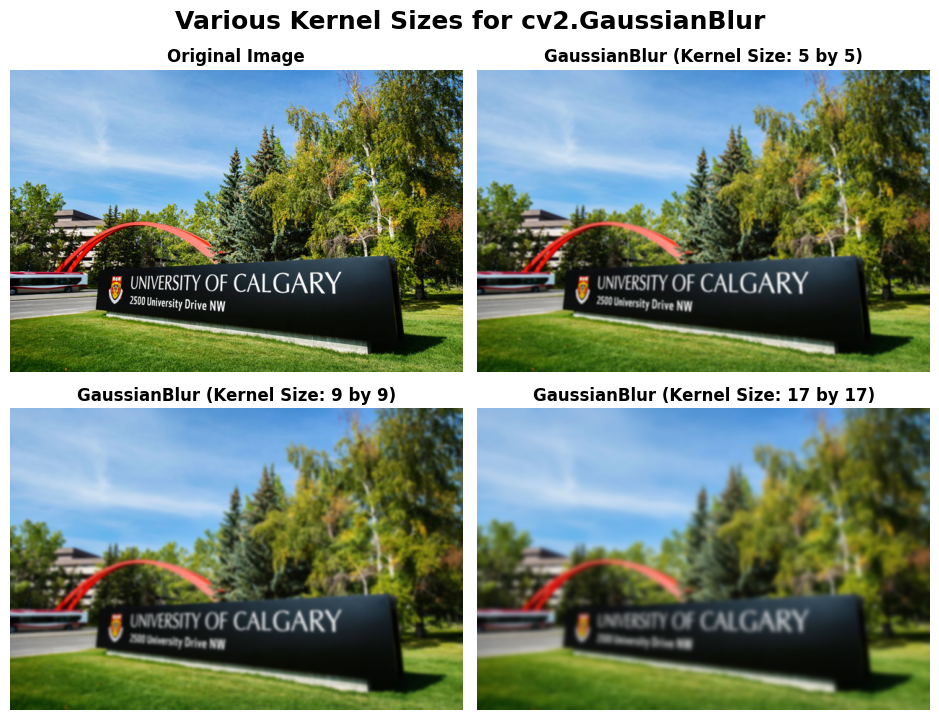

In [ ]:
# Create a 2x2 grid of subplots for displaying images
fig, ax = plt.subplots(2, 2, figsize=(9.5, 7.5))
ax = ax.ravel()  # Flatten the subplots for easier manipulation

# Display the original image in the first subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', weight='bold')

# Loop to display images with Gaussian blur at different kernel sizes
for i in range(1, 4):
    # Calculate the kernel size based on the loop iteration
    ksize_x = (2**(i-1)) * 4 + 1

    # Apply Gaussian blur to the image and display it in the corresponding subplot
    _ = ax[i].imshow(cv2.GaussianBlur(src=Img, ksize=(ksize_x, ksize_x), sigmaX=0, sigmaY=0))

    # Set the title for the subplot with information about the kernel size
    _ = ax[i].set_title(f'GaussianBlur (Kernel Size: {ksize_x} by {ksize_x})', weight='bold')

# Additional settings for each subplot
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
    _ = ax[i].axis('off')    # Turn off axis

_ = fig.suptitle('Various Kernel Sizes for cv2.GaussianBlur', weight='bold', fontsize=18)
# Ensure tight layout for better spacing
plt.tight_layout()

Note that here

In [ ]:
import numpy as np
from pprint import pprint

def gaussian_kernel_2d(ksize_x, ksize_y, sigma_x, sigma_y):
    kernel_x = cv2.getGaussianKernel(ksize_x, sigma_x)
    kernel_y = cv2.getGaussianKernel(ksize_y, sigma_y)
    kernel = kernel_x * kernel_y.T  # Use the outer product to create a 2D kernel
    return kernel

# Example usage
ksize_x = 5
ksize_y = 5
sigma_x = 0
sigma_y = 0
gaussian_kernel = gaussian_kernel_2d(ksize_x, ksize_y, sigma_x, sigma_y)
pprint(gaussian_kernel)

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])


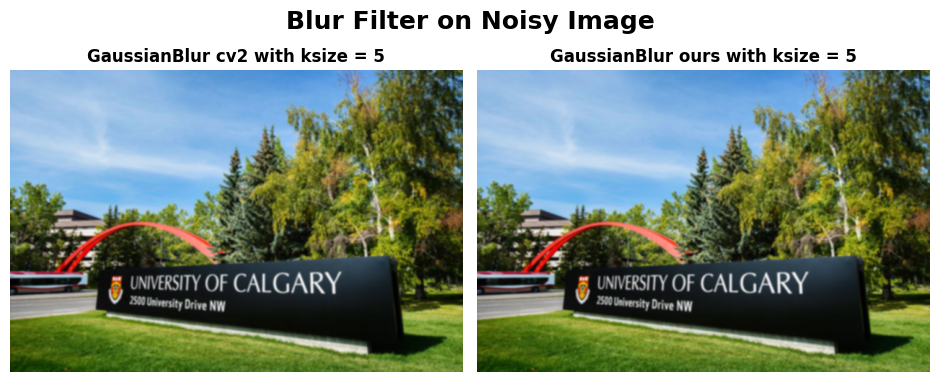

In [ ]:
Img_Gauss_cv2 = cv2.GaussianBlur(src=Img, ksize=(ksize_x, ksize_x), sigmaX=0, sigmaY=0)
Img_Gauss_ours = cv2.filter2D(Img, -1, gaussian_kernel)

# Display the original noisy image with noise and the filtered image side by side
fig, ax = ImShow(Images=[Img_Gauss_cv2, Img_Gauss_ours],
                 Names=['GaussianBlur cv2 with ksize = 5', 'GaussianBlur ours with ksize = 5'],
                 title='Blur Filter on Noisy Image')

## Feature Detection

### Sobel Derivatives

**Sobel Operator**
1. The Sobel Operator is a mathematical tool commonly used in image processing. Its primary purpose is to help us understand how rapidly the intensity of an image changes at each point. In simpler terms, it helps identify edges and details within an image [OpenCV Developers, 2023].

2. What makes the Sobel Operator particularly useful is that it combines two fundamental image processing techniques: smoothing and differentiation [OpenCV Developers, 2023].

**Formulation**

Assuming we have an image, denoted as $I$:

1. **Derivative Calculation:**
   - To begin, we want to find out how the image changes in the horizontal (left to right) direction. This is done by applying a mathematical operation called convolution between the image $I$ and a specific pattern called the "kernel." The kernel used for horizontal changes is denoted as $G_x$. When we have a 3x3 kernel, it looks like this:

   \begin{equation} G_x = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} \end{equation}

   - In parallel, we also want to know how the image changes vertically (from top to bottom). To do this, we apply another convolution with a different kernel called $G_y$, which, with a 3x3 size, appears as:

   \begin{equation} G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix} \end{equation}

   These convolution operations reveal how the intensity of the image varies in both horizontal and vertical directions.

2. **Gradient Approximation:**
   - Now that we have these two sets of information (horizontal and vertical changes), we want to combine them to find an overall measure of change at each point in the image. This is typically done using a method called the "gradient".

   - The gradient at each point is calculated as [OpenCV Developers, 2023]:

   \begin{equation} G = \sqrt{ G_{x}^{2} + G_{y}^{2} } \end{equation}

   This equation computes the magnitude of change by taking the square root of the sum of squared changes in both directions. It provides a measure of how "edgy" or "smooth" the image is at each point [OpenCV Developers, 2023].

   - Alternatively, for simplicity and computational efficiency, we can use the "L1 Norm" to approximate the gradient:

   \begin{equation} G = |G_{x}| + |G_{y}| \end{equation}

   This version considers the absolute values of the changes in both directions and can still be useful in edge detection.
   

**Kernel Size and Accuracy**

When using a small kernel size, such as 3x3, the Sobel operator may produce noticeable inaccuracies in edge detection. This is because the Sobel operator is, fundamentally, an approximation of the derivative of an image [OpenCV Developers, 2023].

**Improved Accuracy with Scharr Operator**

To address this issue and achieve higher accuracy, OpenCV provides the Scharr() function. The Scharr operator is not only faster but also more accurate than the standard Sobel function, especially when dealing with small kernel sizes [OpenCV Developers, 2023].

**Scharr Kernels**

The Scharr operator implements the following kernels for gradient calculation:

- **Horizontal Changes ($G_x$):**
\begin{equation}
G_{x} = \begin{bmatrix} -3 & 0 & +3 \\ -10 & 0 & +10 \\ -3 & 0 & +3 \end{bmatrix}
\end{equation}

- **Vertical Changes ($G_y$):**
\begin{equation}
G_{y} = \begin{bmatrix} -3 & -10 & -3 \\ 0 & 0 & 0 \\ +3 & +10 & +3 \end{bmatrix}
\end{equation}

These Scharr kernels are designed to provide a more accurate estimation of gradient changes, especially in scenarios where fine details and small features need to be detected. They are particularly useful when working with kernel sizes as small as 3x3, where the standard Sobel operator might fall short in terms of accuracy.

For more in-depth information and practical examples on Sobel and Scharr operators, you can explore the [Sobel Derivatives](https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/sobel_derivatives/sobel_derivatives.html?highlight=scharr) documentation.

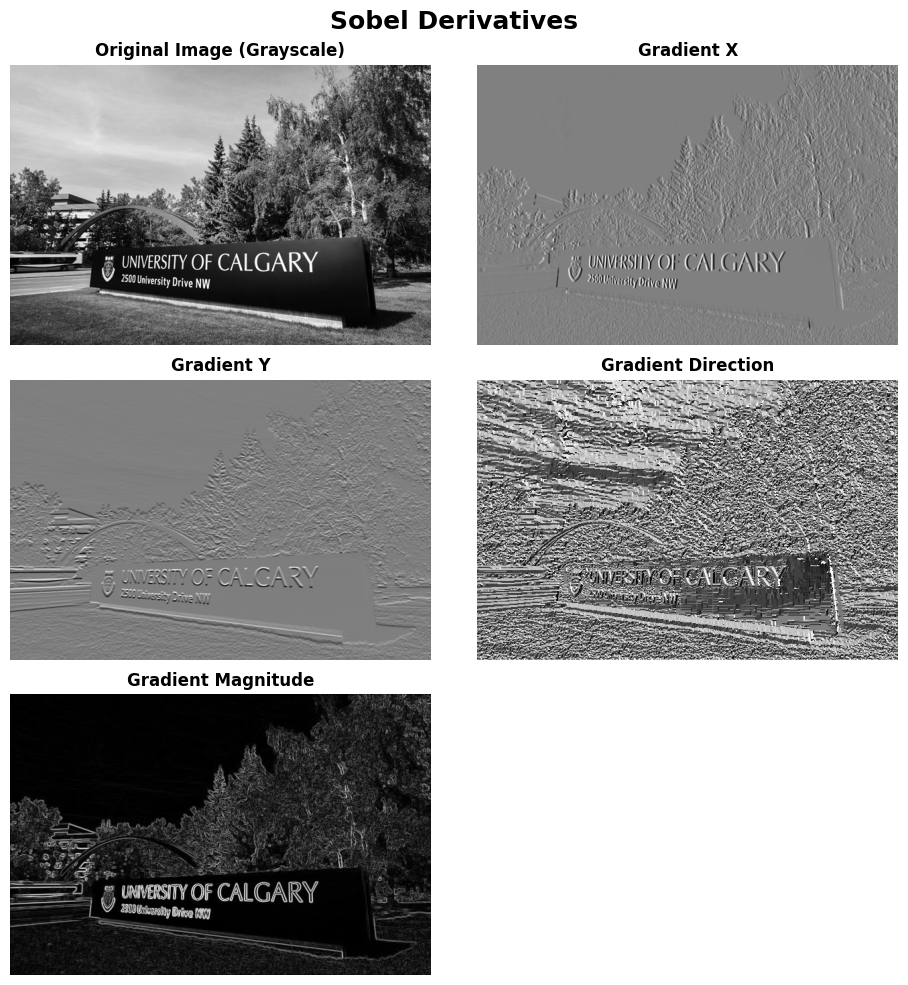

In [ ]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
img_url = r'https://conted.ucalgary.ca/maincampus/maincampus.jpg'
img = cv2.cvtColor(io.imread(img_url), cv2.COLOR_BGR2GRAY)

# Calculate the gradient using the Sobel operator
gradient_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude and direction of the gradient
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)

# Create a 3x2 grid of subplots for displaying images
fig, ax = plt.subplots(3, 2, figsize=(9.5, 10))
ax = ax.ravel()
fig.delaxes(ax[-1])  # Remove the last subplot

# Plot the gradient components
images = [img, gradient_x, gradient_y, gradient_direction, gradient_magnitude]
titles = ['Original Image (Grayscale)', 'Gradient X', 'Gradient Y', 'Gradient Direction', 'Gradient Magnitude']

for i, (image, title) in enumerate(zip(images, titles)):
    ax[i].imshow(cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U), cmap='gray')
    ax[i].set_title(title, weight='bold')

    # Additional settings for each subplot
    ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
    ax[i].axis('off')    # Turn off axis

_ = fig.suptitle('Sobel Derivatives', weight='bold', fontsize=18)
# Ensure tight layout for better spacing
plt.tight_layout()

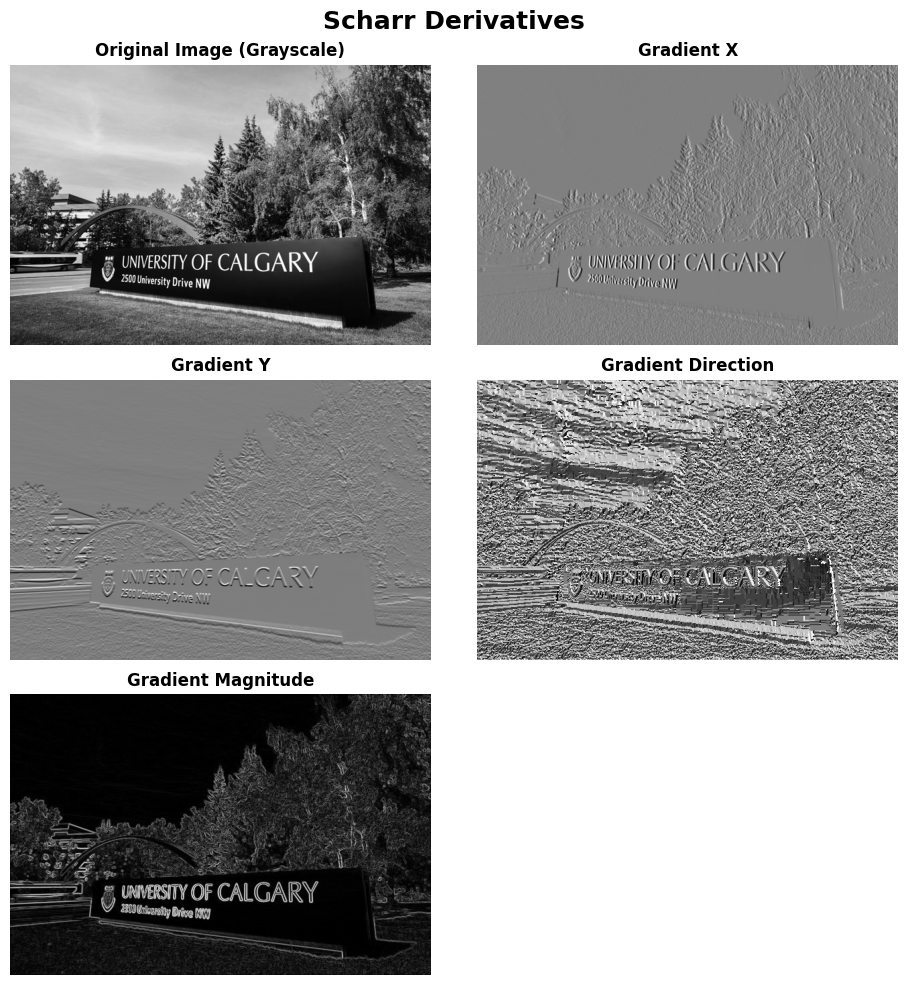

In [ ]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
img_url = r'https://conted.ucalgary.ca/maincampus/maincampus.jpg'
img = cv2.cvtColor(io.imread(img_url), cv2.COLOR_BGR2GRAY)

# Calculate the gradient using the Sobel operator
gradient_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
gradient_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)

# Calculate the magnitude and direction of the gradient
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)

# Create a 3x2 grid of subplots for displaying images
fig, ax = plt.subplots(3, 2, figsize=(9.5, 10))
ax = ax.ravel()
fig.delaxes(ax[-1])  # Remove the last subplot

# Plot the gradient components
images = [img, gradient_x, gradient_y, gradient_direction, gradient_magnitude]
titles = ['Original Image (Grayscale)', 'Gradient X', 'Gradient Y', 'Gradient Direction', 'Gradient Magnitude']

for i, (image, title) in enumerate(zip(images, titles)):
    ax[i].imshow(cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U), cmap='gray')
    ax[i].set_title(title, weight='bold')

    # Additional settings for each subplot
    ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
    ax[i].axis('off')    # Turn off axis

_ = fig.suptitle('Scharr Derivatives', weight='bold', fontsize=18)
# Ensure tight layout for better spacing
plt.tight_layout()

### Canny Edge Detection Algorithm

Canny Edge Detection is a widely employed algorithm for detecting edges in images, introduced by John F. Canny [Canny, 1986]. This multi-stage algorithm involves the following key steps:

1. **Noise Reduction**: To mitigate the impact of image noise, a 5x5 Gaussian filter is applied to the image. This step aims to enhance the overall quality of the image by reducing noise artifacts [OpenCV Developers, 2023].

2. **Intensity Gradient Calculation**: Following noise reduction, the smoothened image undergoes gradient calculations in both horizontal ($G_x$) and vertical ($G_y$) directions. These gradients are used to determine the edge gradient magnitude ($G$) and direction ($\theta$) for each pixel [OpenCV Developers, 2023]:

   \begin{align}
   G &= \sqrt{G_x^2 + G_y^2}\\
   \theta &= \tan^{-1} \left(\frac{G_y}{G_x}\right)
   \end{align}

   It's essential to note that the gradient direction is always perpendicular to the edges and is quantized to one of four angles, representing vertical, horizontal, and two diagonal directions [OpenCV Developers, 2023].

3. **Non-maximum Suppression**: In this stage, a comprehensive scan of the image is conducted to eliminate extraneous pixels that do not constitute edges. For each pixel, a check is performed to ascertain if it is a local maximum within its neighborhood along the gradient direction. If a pixel qualifies as a local maximum, it is retained for subsequent stages; otherwise, it is suppressed (set to zero) [OpenCV Developers, 2023].

<center>
<img src="https://raw.githubusercontent.com/HatefDastour/hatefdastour.github.io/master/_notes/Introduction_to_Digital_Engineering/_images/nms.jpg" alt="picture" width="700">
</center>


Point A resides on the edge in the vertical direction, and the gradient direction aligns perpendicularly to this edge. Points B and C lie along the gradient directions. Point A is subject to evaluation by comparing it to points B and C to determine if it qualifies as a local maximum. If it meets this criterion, it proceeds to the subsequent stage of processing; otherwise, it undergoes suppression and is assigned a value of zero. Image courtesy of {cite:p}`OpenCVDocumentation.
```

4. **Hysteresis Thresholding**: This stage is crucial for distinguishing genuine edges from non-edges. It relies on two threshold values, namely, minVal and maxVal. Pixels with intensity gradients exceeding maxVal are unequivocally identified as edges, while those falling below minVal are unequivocally classified as non-edges and discarded. Pixels falling between these two thresholds are assessed based on their connectivity to "sure-edge" pixels. If they are connected to such pixels, they are deemed part of the edges; otherwise, they are also discarded [OpenCV Developers, 2023].



<center>
<img src="https://raw.githubusercontent.com/HatefDastour/hatefdastour.github.io/master/_notes/Introduction_to_Digital_Engineering/_images/hysteresis.jpg" alt="picture" width="500">
</center>


Edge A surpasses the threshold maxVal, categorizing it as a "sure-edge." Conversely, while edge C falls below maxVal, its connectivity to edge A validates it as a legitimate edge, resulting in the formation of the complete curve. In contrast, edge B, despite exceeding minVal and residing within the same region as edge C, lacks connectivity to any "sure-edge" and is consequently discarded. Consequently, the precise selection of minVal and maxVal is of paramount importance in achieving accurate results. Image courtesy of {cite:p}`OpenCVDocumentation.


It's imperative to carefully select minVal and maxVal to obtain the desired results and effectively eliminate small pixel noise, as the algorithm assumes that edges correspond to elongated lines [OpenCV Developers, 2023].

### Canny Edge Detection in OpenCV

OpenCV conveniently encapsulates the Canny Edge Detection algorithm within a single function: `cv.Canny()`. Let's delve into its usage and parameters.

- **Input Image**: The first argument is the input image on which edge detection is applied.

- **Threshold Values**: The second and third arguments, denoted as minVal and maxVal respectively, establish the lower and upper thresholds for the edge detection process.

- **Aperture Size**: The fourth argument, aperture_size, signifies the size of the Sobel kernel employed for computing image gradients. By default, it assumes a size of 3.

- **L2 Gradient**: The last argument, L2gradient, is a Boolean parameter that specifies the equation for calculating gradient magnitude. When set to True, it employs the more accurate equation discussed earlier: $Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2}$. Conversely, when set to False, it employs the alternative function: $Edge\_Gradient \; (G) = |G_x| + |G_y|$.

### `cv2.Canny` Function

```python
cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) → edges
```

Parameters:
- `image`: This is the input image on which the Canny edge detection is to be applied. It should be a single-channel 8-bit grayscale image.

- `threshold1`: The lower threshold value. It's an integer and is used to identify weaker edges. Pixels with gradient magnitudes below this threshold are discarded as non-edges.

- `threshold2`: The higher threshold value. It's also an integer and is used to identify stronger edges. Pixels with gradient magnitudes above this threshold are marked as strong edges.

- `edges` (optional): This is an output image that will store the edges found by the Canny algorithm. It should have the same size as the input image. This parameter is optional, and if not provided, the function returns the edge map directly.

- `apertureSize` (optional): This is the size of the Sobel kernel used for gradient calculation. It's an integer, and typical values are 3 (default) or 5. A larger aperture size can reduce noise, but it may also reduce sensitivity to small details in the image.

- `L2gradient` (optional): A Boolean parameter (True or False). If set to True, the function uses the $L_2$ gradient magnitude for gradient calculations. If set to False (default), it uses the $L_1$ gradient magnitude. Using $L_2$ gradient can result in slightly more accurate edge detection.

Return Value:
- `edges`: This is the output edge map, either provided as the `edges` parameter or returned by the function. It's a binary image where edge pixels are marked with white (255) and non-edge pixels with black (0).

For further details, refer to the [OpenCV documentation on Canny Edge Detection](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html).

<font color='Blue'><b>Example:</b></font>

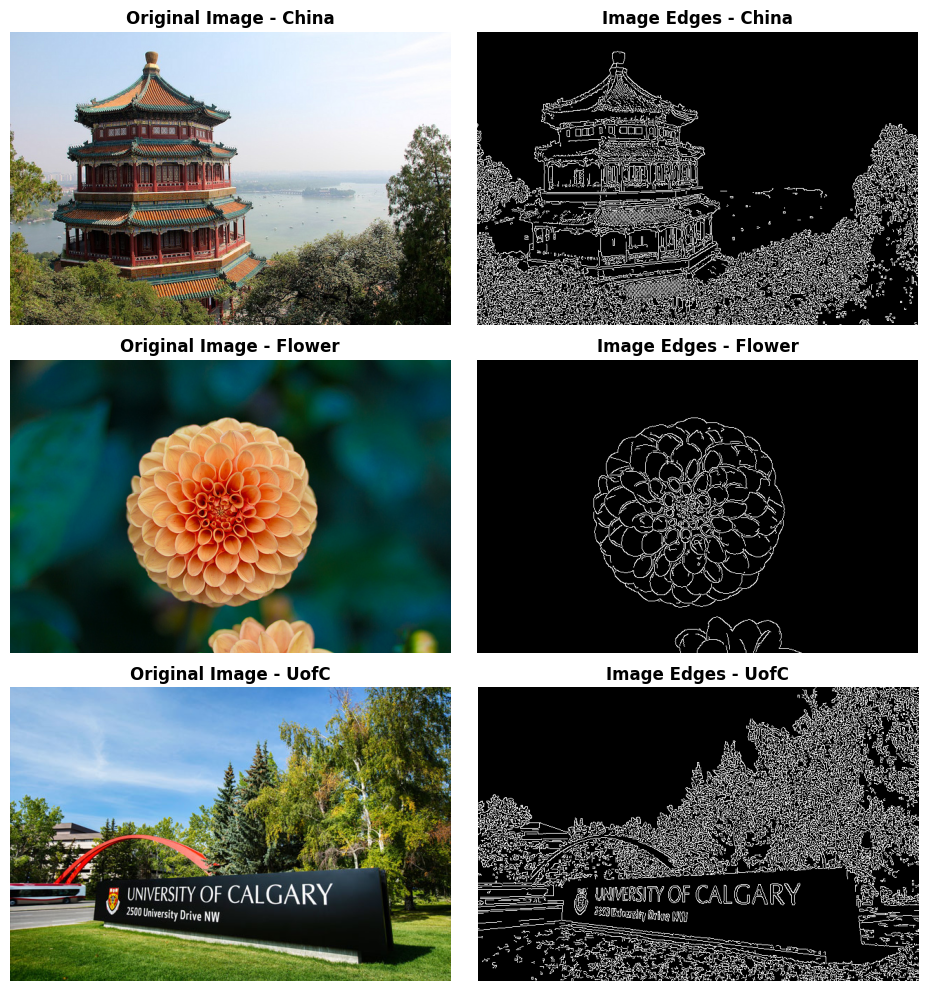

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images
from skimage import io
import cv2

# Load sample images
sample_images = load_sample_images()['images']
sample_names = [x.split("/")[-1].replace('.jpg', '').title() for x in load_sample_images()['filenames']]

# Load the custom image (UofC)
uofc_img_url = r'https://conted.ucalgary.ca/maincampus/maincampus.jpg'
uofc_img = io.imread(uofc_img_url)
sample_images.append(uofc_img)
sample_names.append('UofC')

# Create a 2x2 grid of subplots for displaying images
fig, ax = plt.subplots(len(sample_images), 2, figsize=(9.5, 10))
ax = ax.ravel()  # Flatten the subplots for easier manipulation

# Loop to display original images and their edges
for i, img in enumerate(sample_images):
    # Display the original image in the left subplot
    ax[i*2].imshow(img, cmap='gray')
    ax[i*2].set_title(f'Original Image - {sample_names[i]}', weight='bold')

    # the original image in grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edge_img = cv2.Canny(img, threshold1 = 100, threshold2 = 200)

    # Display the edge-detected image in the right subplot
    ax[i*2+1].imshow(edge_img, cmap='gray')
    ax[i*2+1].set_title(f'Image Edges - {sample_names[i]}', weight='bold')

# Additional settings for each subplot
for i in range(len(ax)):
    ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
    ax[i].axis('off')    # Turn off axis

plt.tight_layout()